In [1]:
import pandas as pd

In [2]:
kent = pd.read_csv("kentstar.csv", encoding='ISO-8859-1')
kent.columns

Index(['stars', 'user_id', 'business_id', 'name', 'name.1', 'stars.1',
       'review_count', 'latitude', 'longitude'],
      dtype='object')

In [11]:
kent.columns=['user_stars','user_id','business_id','user_name','business_name','business_stars','review_count','latitude','longitude']
kent.head()

,user_stars,user_id,business_id,user_name,business_name,business_stars,review_count,latitude,longitude
0,4,Ax7FFPZY2bLlTReQu-oe5A,6DCTAExBd7sp92BcAl80Qw,Emily,Brimfield Bread Oven,4.5,20,41.0972,-81.3457
1,5,dI1xL1mipCf4MXj9_BRcuw,6DCTAExBd7sp92BcAl80Qw,Jon,Brimfield Bread Oven,4.5,20,41.0972,-81.3457
2,4,tZRJgLcBQHtVicblD63PiQ,6DCTAExBd7sp92BcAl80Qw,Clinton,Brimfield Bread Oven,4.5,20,41.0972,-81.3457
3,5,esa6Zo9p5y_adj4dseDj9Q,6DCTAExBd7sp92BcAl80Qw,Amanda,Brimfield Bread Oven,4.5,20,41.0972,-81.3457
4,5,OcKVJHp5se1fRt5GG1ER_Q,6DCTAExBd7sp92BcAl80Qw,C,Brimfield Bread Oven,4.5,20,41.0972,-81.3457


In [15]:
nodes = kent[['business_id','business_name',"business_stars","review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
nodes.head()

,business_id,business_name,business_stars,review_count,latitude,longitude
0,6DCTAExBd7sp92BcAl80Qw,Brimfield Bread Oven,4.5,20,41.0972,-81.3457
20,Tbo-u1y0MEYpVpQkIfhVnw,Chipotle Mexican Grill,1.5,6,41.0998,-81.3859
26,KYW-M0sPLmcr19a6cFR0FA,Penn Station Subs,4.0,5,41.1544,-81.3527
31,9BQGpsIRhs9cRHuGh9xuJw,Toko Japanese Steak House,4.0,36,41.1555,-81.3270
67,Shga7lyRNRFQWoFqTPUQCw,Grazers,4.5,35,41.1503,-81.3600


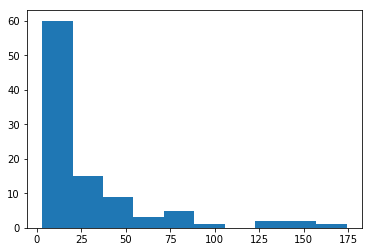

In [8]:
import matplotlib.pyplot as plt
plt.hist(nodes['review_count'])
plt.show()

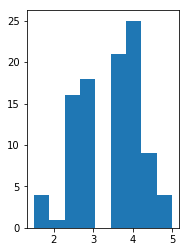

In [18]:
plt.subplot(121)
plt.hist(nodes['business_stars'],bins=9)

plt.show()

In [25]:
import networkx as nx
G_kent = nx.DiGraph()
G_kent = nx.from_pandas_dataframe(kent, 'user_id', 'business_id')
nx.set_node_attributes(G_kent, 'review_count', pd.Series(nodes.review_count.values, index=nodes.business_id).to_dict())
nx.set_node_attributes(G_kent, 'latitude', pd.Series(nodes.latitude.values, index=nodes.business_id).to_dict())
nx.set_node_attributes(G_kent, 'longitude', pd.Series(nodes.longitude.values, index=nodes.business_id).to_dict())
nx.set_node_attributes(G_kent, 'business_name', pd.Series(nodes.business_name.values, index=nodes.business_id).to_dict())

G_kent.nodes(data=True)

[('Ax7FFPZY2bLlTReQu-oe5A', {}),
 ('6DCTAExBd7sp92BcAl80Qw',
  {'business_name': 'Brimfield Bread Oven',
   'latitude': 41.097200000000001,
   'longitude': -81.345699999999994,
   'review_count': 20}),
 ('dI1xL1mipCf4MXj9_BRcuw', {}),
 ('tZRJgLcBQHtVicblD63PiQ', {}),
 ('esa6Zo9p5y_adj4dseDj9Q', {}),
 ('OcKVJHp5se1fRt5GG1ER_Q', {}),
 ('gjoQXkA85yK0gHwvclRBbw', {}),
 ('y73co2edC_-Hl5kDzRxjow', {}),
 ('qT5X0Hef6dH63PTBvqOgQA', {}),
 ('WZwpyuuEnaKQ4jbFiTjhpA', {}),
 ('Q2nKEnECcW-mwf8xuxZC9A', {}),
 ('51munej7rdZuB7KfPofhaA', {}),
 ('GPDskOvUTkPu6FynM1KP3g', {}),
 ('w6BQ63hQrL1kA8bAhS8eqQ', {}),
 ('NHuJ-lTQaEdtj-xcIV98rg', {}),
 ('KgQnRvsPSrJJTOCp-reYZA', {}),
 ('WiWxBf1nB6fWgsKxf8dp9A', {}),
 ('E4eRV_QCQbpNaz_dzoYpTA', {}),
 ('ct-XGBMM9JetcwGaTU3bhw', {}),
 ('DbRU88pclJjwvL6ROhG5vw', {}),
 ('3okybxTquQnYO5t50tNB6Q', {}),
 ('Tbo-u1y0MEYpVpQkIfhVnw',
  {'business_name': 'Chipotle Mexican Grill',
   'latitude': 41.099800000000002,
   'longitude': -81.385900000000007,
   'review_count': 6}),
 

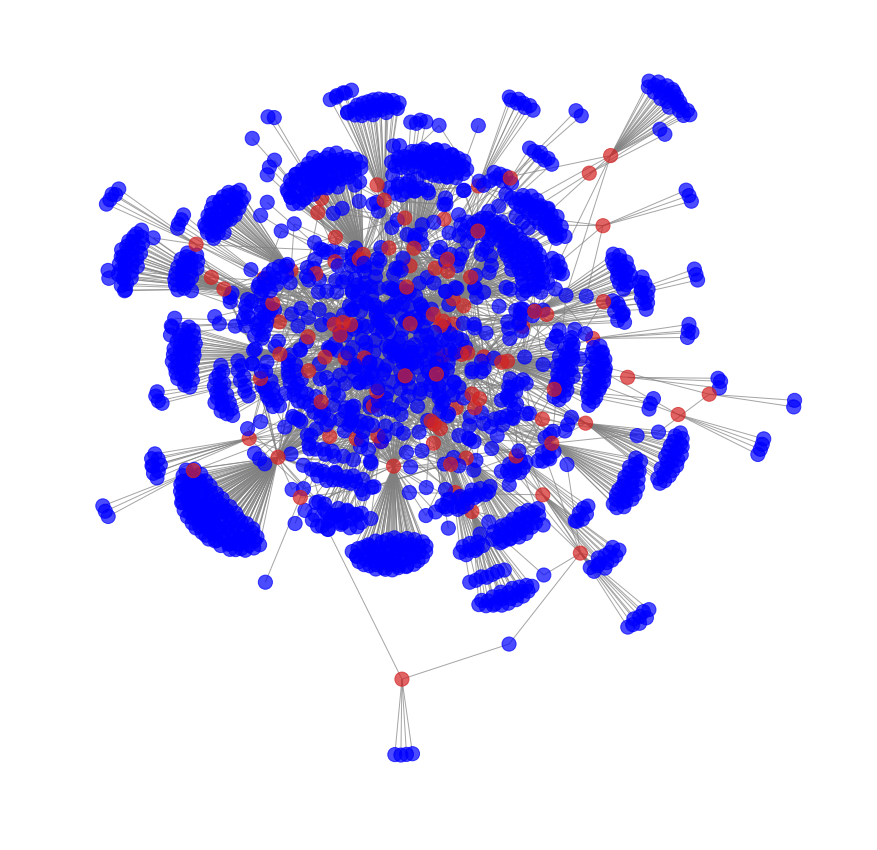

In [21]:
pos = nx.spring_layout(G_kent)
business_kent=set(kent['business_id'])
#user_kent=set[kent['user_id']]
color_map = []
label_map = []

for node in G_kent:
    if node in business_kent:
        color_map.append('#D32323')
        label_map.append("business(restrauant)")
    else: 
        color_map.append('blue') 
        label_map.append("user")

nx.draw_networkx(G_kent,pos,node_color = color_map,node_size=200,edge_color='gray',alpha=.7,with_labels=False)


from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 30,30
plt.axis('off')
plt.show()

In [26]:
business_kent=set(kent['business_id'])

from networkx.algorithms import bipartite
G_kent_b= bipartite.weighted_projected_graph(G_kent, business_kent)
df_kent_b = pd.DataFrame(G_kent_b.edges(data=True), columns=['business1', 'business2', 'weight'])
df_kent_b['weight'] = df_kent_b['weight'].map(lambda x: x['weight'])
G_kent_b.nodes(data=True)

[('Eif660dJb3nqORM6LF3UYg',
  {'business_name': 'Pufferbelly',
   'latitude': 41.152999999999999,
   'longitude': -81.359200000000001,
   'review_count': 55}),
 ('DA3Dzic8NAJ0LYnYZG9nyQ',
  {'business_name': 'Evergreen Chinese Buffet',
   'latitude': 41.155200000000001,
   'longitude': -81.3339,
   'review_count': 29}),
 ('zXVo7md-WC0QUo6RiiunIg',
  {'business_name': "Gionino's Pizzeria",
   'latitude': 41.1008,
   'longitude': -81.346800000000002,
   'review_count': 4}),
 ('-kbEaXQsyEVgKUZRmui0zA',
  {'business_name': 'Taco Bell',
   'latitude': 41.1539,
   'longitude': -81.347499999999997,
   'review_count': 6}),
 ('-fn65iT4z-nh1Ybfyajxng',
  {'business_name': 'La Terraza Bar & Grill',
   'latitude': 41.0974,
   'longitude': -81.388300000000001,
   'review_count': 44}),
 ('ImzivIgEc3XHpAYJyMQnxA',
  {'business_name': 'Ming Cheng Restaurant',
   'latitude': 41.154499999999999,
   'longitude': -81.331999999999994,
   'review_count': 21}),
 ('EKCSvhzoAWHjAlD2Nzj5zg',
  {'business_name':

In [23]:
node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_kent_b.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'-fn65iT4z-nh1Ybfyajxng': (-81.388300000000001, 41.0974),
 '-kbEaXQsyEVgKUZRmui0zA': (-81.347499999999997, 41.1539),
 'DA3Dzic8NAJ0LYnYZG9nyQ': (-81.3339, 41.155200000000001),
 'Eif660dJb3nqORM6LF3UYg': (-81.359200000000001, 41.152999999999999),
 'zXVo7md-WC0QUo6RiiunIg': (-81.346800000000002, 41.1008)}

In [24]:
import mplleaflet

fig, ax = plt.subplots()

edge_width = [1.5*G_kent_b[u][v]['weight'] for u,v in G_kent_b.edges()]
node_size = [20*nx.get_node_attributes(G_kent_b, 'review_count')[v] for v in G_kent_b]
node_color = [G_kent_b.degree(v) for v in G_kent_b]
nx.draw_networkx(G_kent_b,pos=node_positions,node_size=node_size,node_color=node_color, alpha=0.8,  with_labels=False,width=edge_width,edge_color='.4', cmap=plt.cm.Reds)

mplleaflet.display(fig=ax.figure)

In [33]:
btwnCent = nx.betweenness_centrality(G_kent_b,normalized= True,endpoints=False)
import operator
sorted(btwnCent.items(),key=operator.itemgetter(1),reverse=True)[0:5]

[('q8SrBqmGOBiXSJ6Hqy6f7A', 0.0663659679740952),
 ('GdZ-Ryn9QzqV4glodYF6Jg', 0.046420646927138945),
 ('Iw9k29FJCZ0fC68oxK1NtA', 0.04510342338986849),
 ('zSQs_cDOOyjnTHREy9yRfQ', 0.04421825548030644),
 ('BDgEBbNWm6rKLb6JArc3xw', 0.042226023768616075)]

In [31]:
degcen=nx.degree_centrality(G_kent_b)
degreesort=sorted(degcen.items(),key=operator.itemgetter(1),reverse=True)
df_degree = pd.DataFrame(degreesort, columns=['id', 'degreecen'])
df3=df_degree.head(10)
topdeg=df3['id'].values.tolist()

nodes.loc[nodes['business_id'].isin(topdeg)]

,business_id,business_name,business_stars,review_count,latitude,longitude
250,GdZ-Ryn9QzqV4glodYF6Jg,Rays Place,4.0,152,41.1530,-81.3590
675,Iw9k29FJCZ0fC68oxK1NtA,Taco Tonto's,4.0,128,41.1533,-81.3586
935,zSQs_cDOOyjnTHREy9yRfQ,Fresco Mexican Grill & Salsa Bar,4.0,74,41.1525,-81.3580
1009,q8SrBqmGOBiXSJ6Hqy6f7A,Mike's Place,3.5,151,41.1339,-81.3546
1443,XHK_1UM4CBZQ7RemDFr1mQ,Newdle Bar,3.0,75,41.1517,-81.3582
1680,_oucYTswnckrgRuCzW3oVw,Twisted Meltz,4.5,123,41.1536,-81.3569
1863,BDgEBbNWm6rKLb6JArc3xw,Wild Goats Cafe,3.5,97,41.1541,-81.3613
1960,_olByA0m1rBsmByHd8QGtQ,Bistro On Main,3.5,77,41.1532,-81.3906
2105,713qzYFUK00yxwRyxsPt7Q,Bar 145,2.5,174,41.1525,-81.3572
2604,Eif660dJb3nqORM6LF3UYg,Pufferbelly,3.5,55,41.1530,-81.3592


In [32]:
eigcen=nx.eigenvector_centrality_numpy(G_kent_b) 
eigsort=sorted(eigcen.items(),key=operator.itemgetter(1),reverse=True)
df_eig = pd.DataFrame(eigsort, columns=['id', 'eigcen'])
df4=df_eig.head(10)
topeig=df4['id'].values.tolist()

nodes.loc[nodes['business_id'].isin(topeig)]

,business_id,business_name,business_stars,review_count,latitude,longitude
176,QvI-IZJvfpdWINxVghv07A,Tree City Coffee & Pastry,4.0,74,41.1528,-81.3574
250,GdZ-Ryn9QzqV4glodYF6Jg,Rays Place,4.0,152,41.1530,-81.3590
512,c6ed3FFQjKUb4vHOjHCcfA,Wild Papaya Thai Cuisine,4.0,55,41.1551,-81.3338
675,Iw9k29FJCZ0fC68oxK1NtA,Taco Tonto's,4.0,128,41.1533,-81.3586
935,zSQs_cDOOyjnTHREy9yRfQ,Fresco Mexican Grill & Salsa Bar,4.0,74,41.1525,-81.3580
1009,q8SrBqmGOBiXSJ6Hqy6f7A,Mike's Place,3.5,151,41.1339,-81.3546
1443,XHK_1UM4CBZQ7RemDFr1mQ,Newdle Bar,3.0,75,41.1517,-81.3582
1680,_oucYTswnckrgRuCzW3oVw,Twisted Meltz,4.5,123,41.1536,-81.3569
1863,BDgEBbNWm6rKLb6JArc3xw,Wild Goats Cafe,3.5,97,41.1541,-81.3613
2105,713qzYFUK00yxwRyxsPt7Q,Bar 145,2.5,174,41.1525,-81.3572


In [34]:
clustering=nx.clustering(G_kent_b)
clustersort=sorted(clustering.items(),key=operator.itemgetter(1),reverse=True)
df_cluster = pd.DataFrame(clustersort, columns=['id', 'clustercent'])
df_cluster.head()

,id,clustercent
0,zXVo7md-WC0QUo6RiiunIg,1.0
1,TUZTu3dQxSxSIKRMkHQrsA,1.0
2,HsAVVdyrzSPORCrpHbMg9g,1.0
3,nrxmMlgoiScXTLIGzv3o5Q,1.0
4,3vg-0VwYvK_rss-562_DiA,1.0


In [35]:
closesort=sorted(closeCent.items(),key=operator.itemgetter(1),reverse=True)
df_close = pd.DataFrame(closesort, columns=['id', 'closecent'])
df_close.head()

,id,closecent
0,q8SrBqmGOBiXSJ6Hqy6f7A,0.873874
1,Iw9k29FJCZ0fC68oxK1NtA,0.829060
2,GdZ-Ryn9QzqV4glodYF6Jg,0.822034
3,BDgEBbNWm6rKLb6JArc3xw,0.815126
4,zSQs_cDOOyjnTHREy9yRfQ,0.795082


In [36]:
close_cluster=pd.merge(df_close, df_cluster, on = 'id')
close_cluster.head()

,id,closecent,clustercent
0,q8SrBqmGOBiXSJ6Hqy6f7A,0.873874,0.416397
1,Iw9k29FJCZ0fC68oxK1NtA,0.829060,0.456254
2,GdZ-Ryn9QzqV4glodYF6Jg,0.822034,0.447018
3,BDgEBbNWm6rKLb6JArc3xw,0.815126,0.472793
4,zSQs_cDOOyjnTHREy9yRfQ,0.795082,0.450313


In [37]:
degree_cluster=pd.merge(df_degree,df_cluster,on='id')
degree_cluster

,id,degreecen,clustercent
0,q8SrBqmGOBiXSJ6Hqy6f7A,0.855670,0.416397
1,Iw9k29FJCZ0fC68oxK1NtA,0.793814,0.456254
2,GdZ-Ryn9QzqV4glodYF6Jg,0.783505,0.447018
3,BDgEBbNWm6rKLb6JArc3xw,0.773196,0.472793
4,zSQs_cDOOyjnTHREy9yRfQ,0.742268,0.450313
5,713qzYFUK00yxwRyxsPt7Q,0.711340,0.507673
6,_oucYTswnckrgRuCzW3oVw,0.690722,0.549073
7,XHK_1UM4CBZQ7RemDFr1mQ,0.639175,0.562136
8,_olByA0m1rBsmByHd8QGtQ,0.639175,0.524590
9,Eif660dJb3nqORM6LF3UYg,0.597938,0.618875


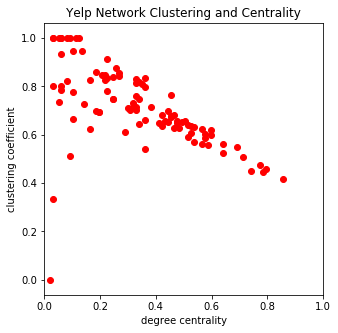

In [38]:
plt.figure(figsize=(5,5))
plt.scatter(degree_cluster.degreecen,close_cluster.clustercent,color='r')
plt.xlabel("degree centrality")
plt.ylabel("clustering coefficient")
plt.xlim(0,1)
plt.title("Yelp Network Clustering and Centrality")
plt.savefig("clustering$centrality.jpg")
plt.show()